In [2]:
from torch.utils.data import Dataset
import h5py
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

class h5DatasetNew(Dataset):
    def __init__(self, sample):
        self.orginalPathList = []
        self.accelPathList = []
        self.orginalFileList = []
        self.accelFileList = []
        # self.mid = int(256/2) - 3  ## minus three because we are taking the middle 8 slices
        plt.rcParams["figure.figsize"] = [10, 10]
        plt.rcParams["figure.autolayout"] = True

        allImages = sorted(glob("/study/mrphys/skunkworks/training_data//mover01/*/", recursive=True))
        folderName  = allImages[sample]
        self.orginalPathList.append(folderName + 'processed_data/C.h5')
        self.accelPathList.append(folderName +'processed_data/acc_2min/C.h5')
        
        for orginalPath, accelPath in zip(self.orginalPathList, self.accelPathList):
            prefix = 'C_000_0'
            orginalImageNumpy_Stack = None
            accelImageNumpy_Stack = None
            with h5py.File(orginalPath,'r') as hf:
                channel_one_max = abs(hf['Images']['C_000_000']['real']).max()
                for i in range(6):
                    n = prefix + str(i).zfill(2)
                    image = hf['Images'][n]
                    imageNumpy = image['real']
                    
                    imageNumpy = imageNumpy * (1/(channel_one_max))
                    orginalImageNumpy = np.array(imageNumpy + 0j*image['imag'])
                    if i == 0:
                        orginalImageNumpy_Stack = np.expand_dims(np.copy(orginalImageNumpy), axis=0)
                    else:
                        orginalImageNumpy_Stack = np.concatenate((orginalImageNumpy_Stack, np.expand_dims(orginalImageNumpy, axis=0)), axis=0)

            
            with h5py.File(accelPath,'r') as hf:
                channel_one_max = abs(hf['Images']['C_000_000']['real']).max()
                for i in range(6):
                    n = prefix + str(i).zfill(2)
                    image = hf['Images'][n]

                    imageNumpy = image['real']
                    imageNumpy = imageNumpy * (1/(channel_one_max))
                    accelImageNumpy = np.array(imageNumpy + 0j*image['imag'])
                    if i == 0:
                        accelImageNumpy_Stack = np.expand_dims(np.copy(accelImageNumpy), axis=0)
                    else:
                        accelImageNumpy_Stack = np.concatenate((accelImageNumpy_Stack, np.expand_dims(accelImageNumpy, axis=0)), axis=0)

            for i in range(256): ## train each slice for the first 6 channels for each subject
                for j in range(6):
                    if j == 0:
                        orginalStack =np.expand_dims(np.copy(orginalImageNumpy_Stack[j][i][32:224]), axis=0)
                        accelStack =np.expand_dims(np.copy(accelImageNumpy_Stack[j][i][32:224]), axis=0)
                    else:
                        orginalStack = np.concatenate((orginalStack, np.expand_dims(orginalImageNumpy_Stack[j][i][32:224], axis=0)), axis=0)
                        accelStack = np.concatenate((accelStack, np.expand_dims(accelImageNumpy_Stack[j][i][32:224], axis=0)), axis=0)
                self.orginalFileList.append(orginalStack)
                self.accelFileList.append(accelStack)
            print('Image ' + orginalPath + ' loaded')

    def __getitem__(self, index):
        return self.accelFileList[index], self.orginalFileList[index]

    def __len__(self):
        return len(self.accelFileList)

In [35]:
import pickle
from tqdm import tqdm
allImages = sorted(glob("/study/mrphys/skunkworks/training_data//mover01/*/", recursive=True))
for i in tqdm(range(len(allImages))):
    data = h5DatasetNew(i)
    with open(f'/scratch/mrphys/pickled/dataset_volnormed_{i}.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del data
    break

  0%|                                                                                            | 0/65 [00:00<?, ?it/s]

Image /study/mrphys/skunkworks/training_data//mover01/M001/processed_data/C.h5 loaded


  0%|                                                                                            | 0/65 [00:12<?, ?it/s]


In [34]:
import pickle
i = 0
with open(f'/scratch/mrphys/pickled/dataset_volnormed_{i}.pickle', 'rb') as f:
    data = pickle.load(f)

EOFError: Ran out of input

In [11]:
data = h5DatasetNew(i)

Image /study/mrphys/skunkworks/training_data//mover01/M066/processed_data/C.h5 loaded


In [20]:
a,b = data[100]

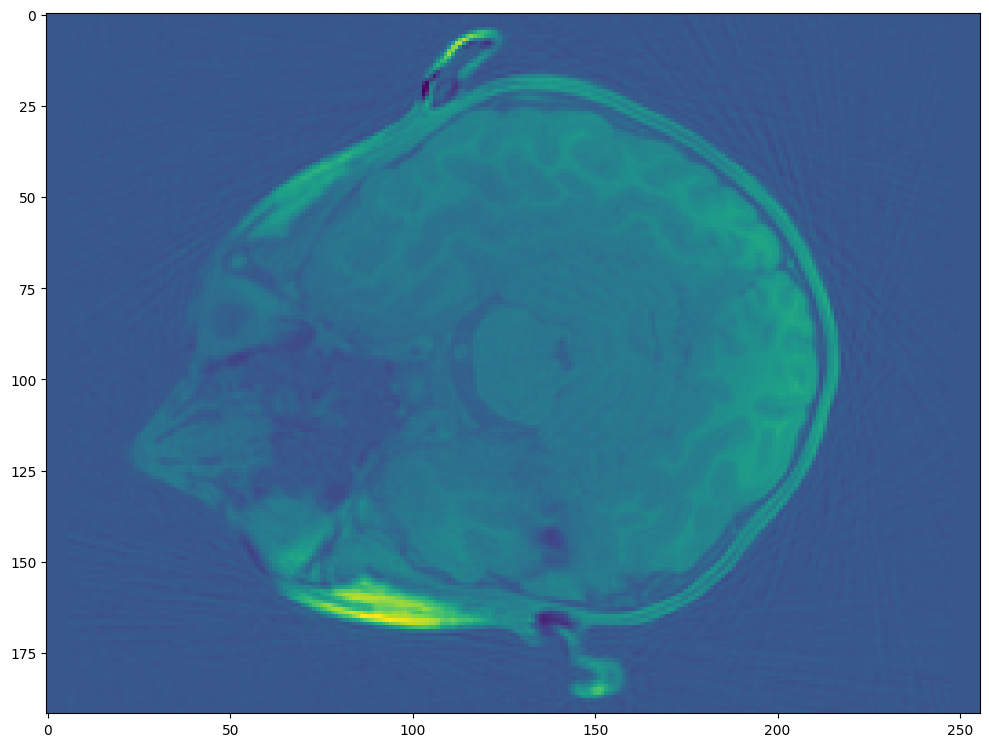

In [21]:
plt.imshow(b[0].real)

In [32]:
for s in a:
    print(np.max(s), np.min(s))

(0.8931099+0j) (-0.46617168+0j)
(0.07026924+0j) (-0.182903+0j)
(0.14439373+0j) (-0.145973+0j)
(0.13662122+0j) (-0.12754849+0j)
(0.12660721+0j) (-0.120303854+0j)
(0.11093599+0j) (-0.11251416+0j)


In [ ]:
def plotAll(X, pred, Y):
    fig, ax = plt.subplots(3, 16, figsize=(20,2)) 
    for i in range(16):
        ax[i].imshow(data[0,i].real)
        ax[i].axis('off')
    plt.show()
    
plotAll(X)
plotAll(pred)
plotAll(Y)

In [ ]:
def inverseSigmoid

In [3]:
import pickle
i = 60
with open(f'/scratch/mrphys/pickled/dataset_volnormed_{i}.pickle', 'rb') as f:
    data = pickle.load(f)

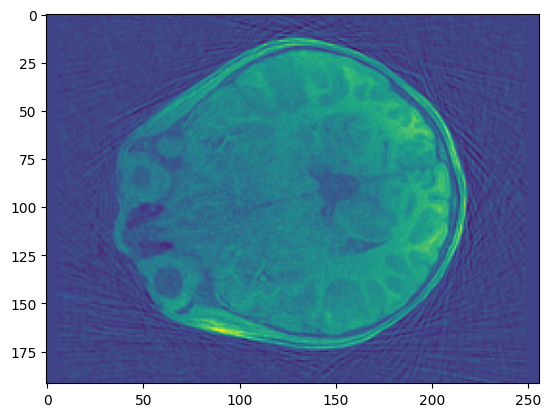

In [19]:
plt.imshow(data[120][0][0].real)

In [20]:
data[120]

(array([[[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         ...,
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
 
        [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         ...,
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
 
        [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
      

In [30]:
import torch
a = torch.tensor(data[10][0][0])

In [31]:
torch.logit(torch.sigmoid(a).real)

tensor([[ 0.0000,  0.0000,  0.0103,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0208,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0077,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000, -0.0096,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0102,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.0022,  ...,  0.0000,  0.0000,  0.0000]])

In [33]:
a.real

tensor([[ 0.0000,  0.0000,  0.0103,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0208,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0077,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000, -0.0096,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0102,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.0022,  ...,  0.0000,  0.0000,  0.0000]])

In [36]:
.shape

(6, 192, 256)

In [38]:
X = torch.unsqueeze(torch.tensor(data[120][0]),0)

<Figure size 640x480 with 0 Axes>

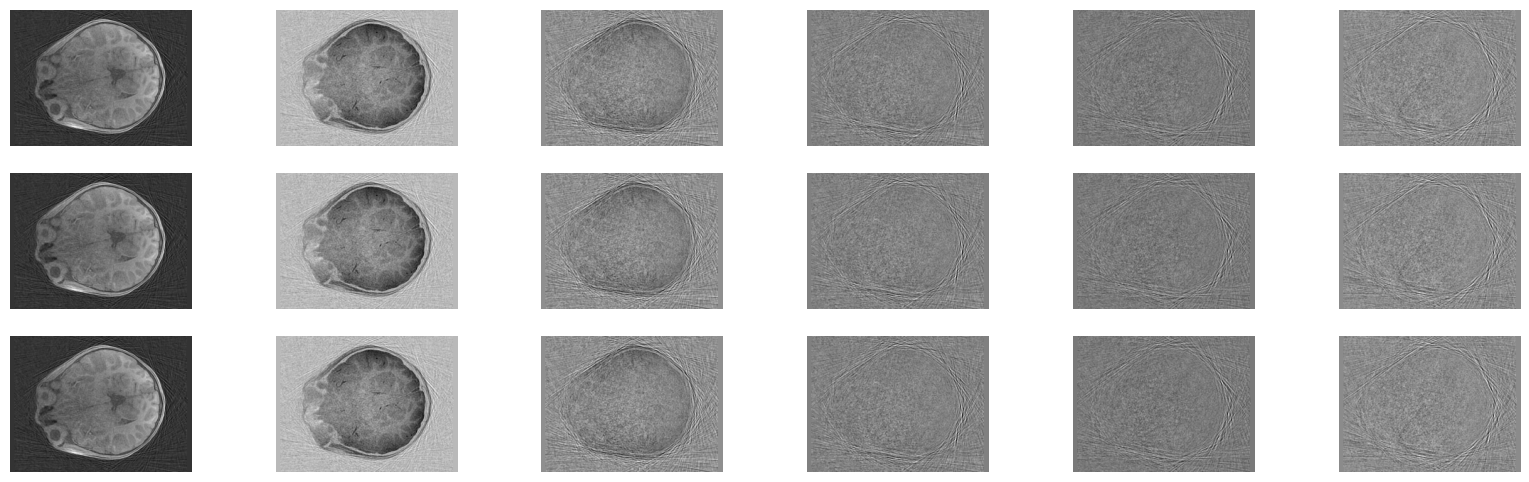

In [50]:
def plotAll(data):
    X, pred, Y = data
    plt.gray()
    fig, ax = plt.subplots(3, 6, figsize=(20,6)) 
    for i in range(6):
        ax[0,i].imshow(X[0,i].real)
        ax[0,i].axis('off')
    for i in range(6):
        ax[1,i].imshow(pred[0,i].real)
        ax[1,i].axis('off')
    for i in range(6):
        ax[2,i].imshow(Y[0,i].real)
        ax[2,i].axis('off')
    plt.show()
    
plotAll([X,X,X])